In [3]:
import json
import re
import numpy
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [4]:

with open('../data/DPR/DPR_train.json') as f:
    data = json.load(f)
    
# Convert JSON data to DataFrame
df = pd.json_normalize(data, record_path=['DPR_result'], meta=['question', 'positive_passage', 'positive_passage_id', 'found_at_rank'])


# Filter rows where the rank is between 10 and 20
rank_from = 10
rank_to = 11
filtered_df = df[(df['rank'] >= rank_from) & (df['rank'] <= rank_to)]
filtered_df = filtered_df[(filtered_df['is_target'] == False)]
filtered_df

,x,label,passage_id
0,"Hello, I forgot o update my address, can you h...",0,2846
1,"Can I do my DMV transactions online?agent: hi,...",0,2596
2,You've got it. Another query about DMV. What h...,0,2772
3,"Besides that, will I receive a notice?agent: t...",0,1954
4,If you submit the affidavit?agent: the NYS De...,0,2164
...,...,...,...
21446,What if I've fallen behind on one or more loan...,0,1803
21447,I have another question regarding the Military...,0,1984
21448,something else I want to ask about FAFSA. What...,0,3696
21449,How can I make a payment by post?agent: contac...,0,828


In [15]:

data = []
with open('../data/DPR_pairs/DPR_pairs_train_20-60.json') as f:
    for line in f:
        data.append(json.loads(line))

neg_data = []
for d in data:
    if d['label'] == 0:
        neg_data.append(d)
        
df = pd.DataFrame(neg_data, columns=['x', 'label', 'passage_id'])
df['passage_id'] = pd.to_numeric(df['passage_id'])

In [16]:
filtered_df = df 
filtered_df

,x,label,passage_id
0,"Hello, I forgot o update my address, can you h...",0,2846
1,"Can I do my DMV transactions online?agent: hi,...",0,2596
2,You've got it. Another query about DMV. What h...,0,2772
3,"Besides that, will I receive a notice?agent: t...",0,1954
4,If you submit the affidavit?agent: the NYS De...,0,2164
...,...,...,...
21446,What if I've fallen behind on one or more loan...,0,1803
21447,I have another question regarding the Military...,0,1984
21448,something else I want to ask about FAFSA. What...,0,3696
21449,How can I make a payment by post?agent: contac...,0,828


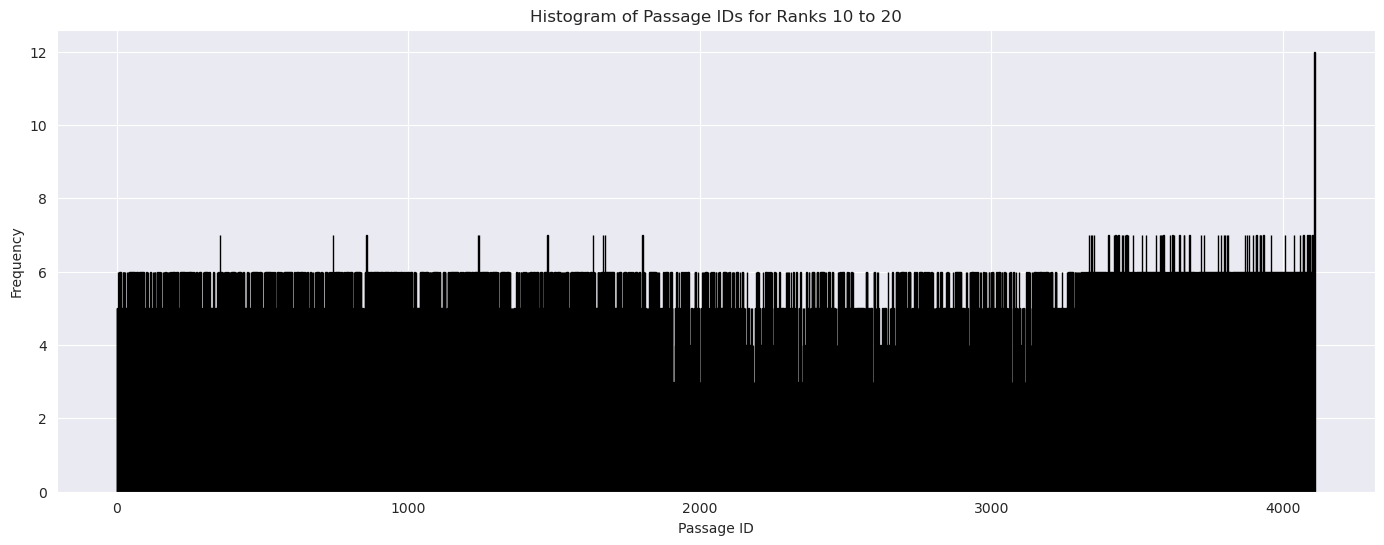

In [17]:

# Create histogram based on passage_id
plt.figure(figsize=(17, 6))
plt.hist(filtered_df['passage_id'], bins=range(min(filtered_df['passage_id']), max(filtered_df['passage_id']) + 1, 1), edgecolor='black')
plt.title('Histogram of Passage IDs for Ranks 10 to 20')
plt.xlabel('Passage ID')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [16]:
filtered_df['passage_id'].unique()


array([2755, 1803, 2708, ..., 4075, 4073,  341])

In [5]:
filtered_df['passage_id'].value_counts().describe()


count    4062.000000
mean      242.897095
std       178.309328
min         1.000000
25%       115.000000
50%       205.000000
75%       321.000000
max      1355.000000
Name: count, dtype: float64

In [6]:
filtered_df['passage_id'].describe()

count    986648.000000
mean       1909.377039
std        1237.118210
min           0.000000
25%         817.000000
50%        1755.000000
75%        3028.000000
max        4109.000000
Name: passage_id, dtype: float64

In [12]:
filtered_df['passage_id'].value_counts()

passage_id
446     1355
2193    1270
555     1133
999     1091
2753    1087
        ... 
2872       1
2251       1
2320       1
2859       1
2380       1
Name: count, Length: 4062, dtype: int64

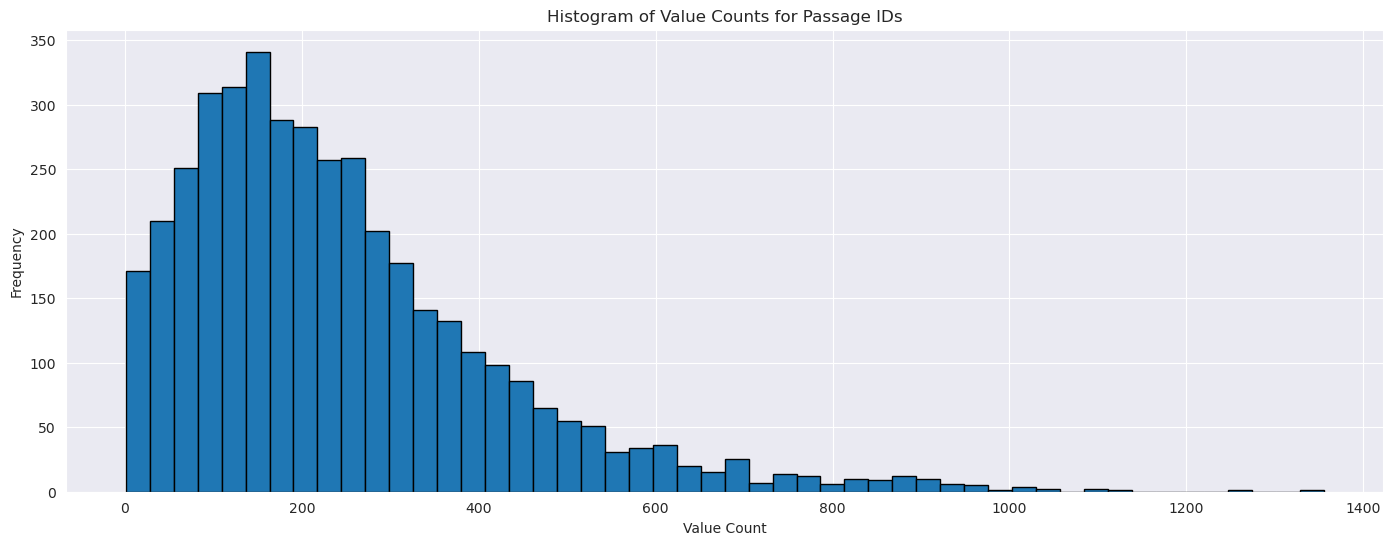

In [7]:
# histogram of value counts
vc = filtered_df['passage_id'].value_counts()
plt.figure(figsize=(17, 6))
plt.hist(vc, bins=50, edgecolor='black')
plt.title('Histogram of Value Counts for Passage IDs')
plt.xlabel('Value Count')   
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [11]:
vc[vc < 200].size

1975